# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Content
110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.
scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

Source: https://www.kaggle.com/joniarroba/noshowappointments


# Questions to ask:

### What is the percentage of differnt variables ?
### What is the distribution of  some variables ?
### Do some variables related to no shows ?

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading and Exploring data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv") 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Inspeting dataframe columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#Count of Null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
#Count of duplicated values
df.duplicated().sum()

0


### Data Cleaning 
###### 1-rename columns
to be easier to deal with

In [6]:
df.rename(columns= lambda x: x.strip().lower().replace("-","_"),inplace=True)

In [7]:
df.rename(columns={"patientid":"patient_id","appointmentid":"appointment_id",
                   "scheduledday":"scheduled_day","appointmentday":"appointment_day"},inplace = True)

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


###### 2- Change columns types:
1-patient_id to str 
as when it is converted to int they give negative values

2- scheduled_day , appointment_day to date time

In [8]:
df['patient_id'] = df['patient_id'].astype(str)

col = ["scheduled_day","appointment_day"]
for c in col:
    df[c] = pd.to_datetime(df[c])

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# clear decimal point of patient_id column 
df["patient_id"] = df['patient_id'].apply(lambda x: x[:-2])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null object
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns, UTC]
appointment_day    110527 non-null datetime64[ns, UTC]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns, UTC](2), int64(8), object(4)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### What is the percentage of differnt varaibles?

In [10]:
prop = []
col = ["scholarship","hipertension","diabetes","alcoholism","handcap"]

for c in col:
    p = df[c].sum()/len(df)
    prop.append(p)
    print("Percentage of "+ c +" : " + str(p*100))

Percentage of scholarship : 9.826558216544374
Percentage of hipertension : 19.72459218109602
Percentage of diabetes : 7.186479321794674
Percentage of alcoholism : 3.039981181068879
Percentage of handcap : 2.2247957512643968


#### Percentage of patients that have Scholarship are less than 10%
#### Percentage of patients that have chronic conditions are more than 25 %

### What is the distribution of  some variables ?

#### Distribution of age

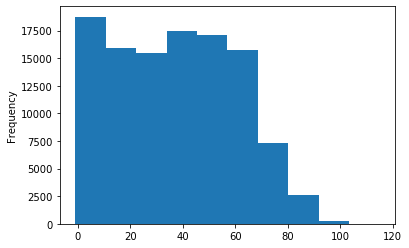

In [11]:
df['age'].plot.hist()
plt.show()

##### number of  people older then 70 are less than the other age groups  by half which should be the reverse 

#### Distribution of gender

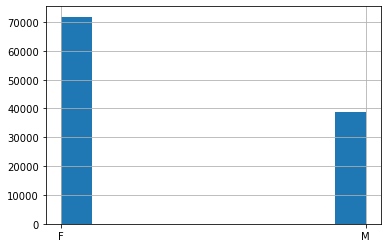

In [12]:
df['gender'].hist()
plt.show()

##### number of females is double the number of males

#### Distribution of no shows

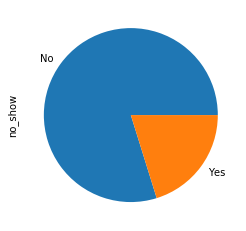

In [13]:
df['no_show'].value_counts().plot.pie()
plt.show()

##### Number of missed appointments aprrox. fifth of the appointments

### Do some variables related to no shows ?

#### To explore variables :
1- scholarship
2- sms received

In [16]:
# Create function to plot relationship
def plothist(var,x_axis,y_axis,title):
    df.groupby("no_show")[var].plot.hist(legend=True, xticks= (0,1))
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.show()

#### Scholarship

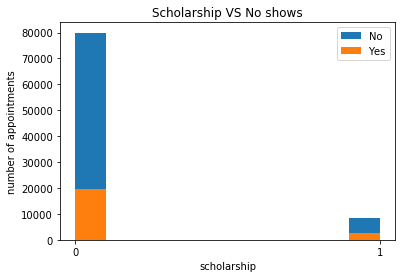

In [18]:
plothist('scholarship','scholarship',"number of appointments","Scholarship VS No shows")

##### Number of people with no sholarship is far more than those with scholarship

#### SMS received

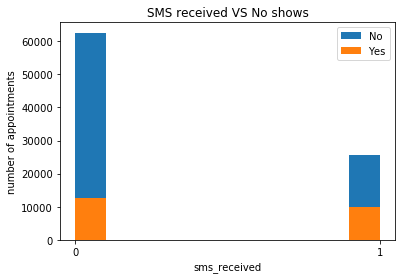

In [20]:
plothist('sms_received',"sms_received","number of appointments","SMS received VS No shows")

##### Number of people who didn't recieve SMS is the double of those whoe received SMS

<a id='conclusions'></a>
## Conclusions


#### 1- a) Percentage of those have Scholarship is less than 10%
####     b) Percentage of those have chronic conditions is more than 25 %
####     c) Percentage of those have alcoholism 3 %
####     d) Percentage of those who are handcaped is 2.2 %

#### 2 - a) number of  people older then 70 are less than the other age groups  by half which should be the reverse 
####      b) number of females is double the number of males

#### 3- a) Sholarship doesn't have great impact on missing appointments
####     b)People recieved massages half of them missed appointments

### Limitations

#### 1- Timeframe for this dataset is aprrox. one month which isn't sufficient 
#### 2- Age groups represnted here are query and need more investigation as age group between 20 to 40 are much larger presented              than 70 and older which is illogical
#### 3- People have scholarship are less presented and should be more presented to predict if having scholarship has the impact on                 missing appointment 
#### 4-People received SMS and those didn't receive should be equal to compare the real impact of SMS
